##**Importing required libraries**

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC
# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV file using pandas.read_csv function in dataframe format**

In [154]:
data = pd.read_csv('/content/glass.csv')

**head() displays first 5 rows details of data**

In [155]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**tail() displays last 5 rows deatil of data**

In [156]:
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


**info() summary of dataframe**

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


**Statistical details about data**

In [158]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**Check NULL values**

In [159]:
data.isnull().values.any()

False

**Count number of label("Type")**

In [160]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

##**Data Visualization**

Below visualization show pairwise relation between the features.

The maximum correlation is between 'Type' and 'Ca' and 
its value is 0.81, so we can say that as one increases, the other increases and vice versa.


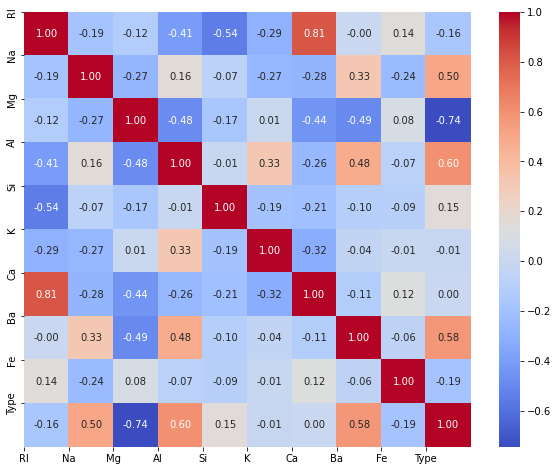

In [161]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

# **Distribution of class**

Dataset Distribution Glass type shows the distribution of each type of glass in the data set and the number of times a particular glass has occurred in a data set. 

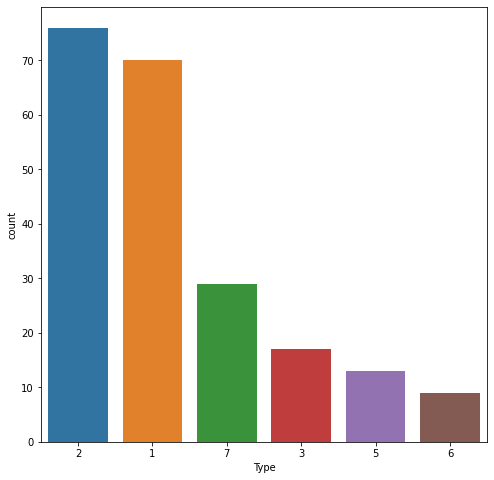

In [162]:
plt.figure(figsize=(8,8))
sns.countplot(x='Type', data=data, order=data['Type'].value_counts().index)

**Box plot to show distribution of values over Type(1,2,3,5,6,7)**



In [163]:
def draw_box_plot(values, palette_set):
  # detrmines plot size
  plt.figure(figsize=(15,15))

  # for each feature in values
  for i, value in enumerate(values):
      # logic to divide the subplots into a 5*2 grid and place each subplot in cells
      rows = int(len(values)/2)
      plt.subplot(rows, 2, i+1)
      # draw boxplot
      sns.boxplot(x='Type', y=value,hue = 'Type', data=data, palette = palette_set)

  plt.tight_layout()
  plt.show()

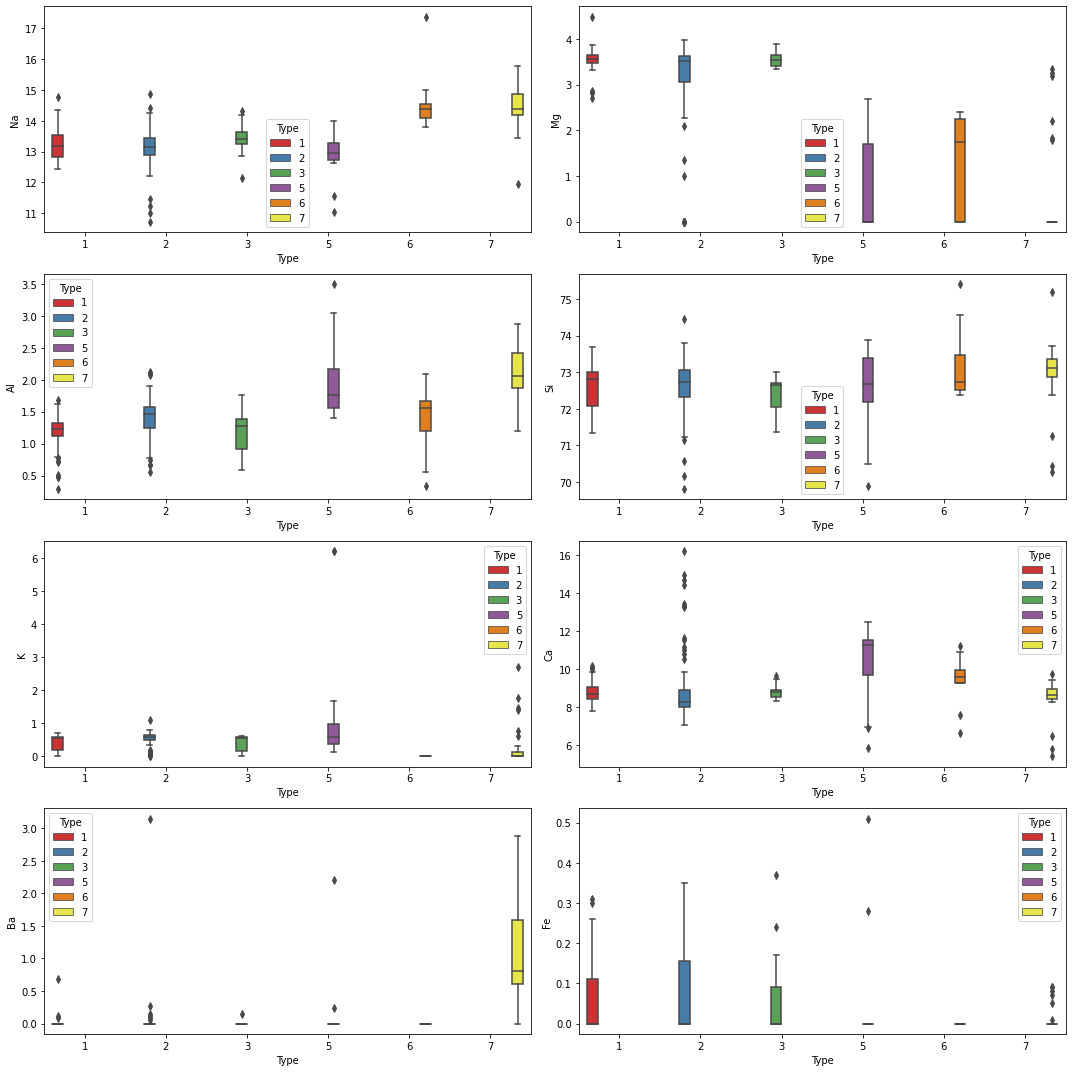

In [164]:
col_values= list(data.columns[1:9])
draw_box_plot(col_values,"Set1")

##**Implement Naive Bayes and Linear SVM model**
1. Divide X and y based on "Type" classes. All independent variables are stored in X variable and dependent variables are stored in y variable.

2. Split the data into test and train using train_test_split function. 75% of the data is used for training, 25% is used for testing the model.

3. Implement Naive Bayes model by importing GaussianNB from scikit learn.Fit the model using parameters X_train and y_train.

4. Predict model accuracy using test set results.

5. We got accuracy of 46.3%

6. Print classification report. This report contains accuracy of F1score, precision and recall.

In [165]:
X = data.drop('Type', axis=1)
y = data['Type'].values

**Split the dataset into the Training set and Test set**

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Fit the model**

In [167]:
model_1 = GaussianNB()
model_1.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Predicting the Test set results**

In [168]:
y_pred_NB = model_1.predict(X_test)

# Calculating Accuracy
print('Accuracy of Naive Bayes model is: ', round(metrics.accuracy_score(y_test, y_pred_NB)*100,2))

Accuracy of Naive Bayes model is:  46.3


**Classification report**

In [169]:
print(classification_report(y_test, y_pred_NB))



              precision    recall  f1-score   support

           1       0.32      0.64      0.43        14
           2       0.45      0.21      0.29        24
           3       0.50      0.40      0.44         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         7

    accuracy                           0.46        54
   macro avg       0.49      0.54      0.49        54
weighted avg       0.49      0.46      0.44        54



# **Implement linear SVM model**

1. As we have already split data into train and test by 75:25 ratio. Here, directly we are fitting SVC model which is imported using sklearn.svm.

2. Predict model accuracy using test set results.

3. We got accuracy of 55.56% for SVC model

4. Print classification report. This report contains accuracy of F1score, precision and recall.

In [170]:
# Model Training set into linear SVM
model_2 = SVC(kernel='linear')
model_2.fit(X_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Predict the Test set results**

In [171]:
y_pred_SVM = model_2.predict(X_test)

# Calculate Accuracy of SVM Model
print('Accuracy of linear SVM model is: ', round(metrics.accuracy_score(y_test, y_pred_SVM)*100,2))

Accuracy of linear SVM model is:  55.56


**Classification report**

In [172]:
report = print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           1       0.43      0.86      0.57        14
           2       0.60      0.38      0.46        24
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.56        54
   macro avg       0.45      0.54      0.47        54
weighted avg       0.53      0.56      0.51        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conclusion**

We got Good accuracy for linear SVM model

Naive Bayes treats feature as independent and works by assuming presence of some of features are unrelated to the presence of other feature. It is probabalistic classifier. but SVM verifies interaction between features. Instead of taking probablistic approach it follows geometric interpretation of problem.
This helps acheiving more accuracy than naive bayes.